# Crop Production Analysis

This notebook provides a detailed analysis of crop production trends across different seasons, states, and years. 
The dataset includes information on crop types, production volumes, cultivated areas, and seasonal trends. 

### **Key Objectives:**
1. Identify overall crop production trends.
2. Analyze the most suitable crops for each season.
3. Explore state-wise production variations.
4. Examine the correlation between cultivated area and production.
5. Detect outliers in crop production.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "IAS.csv"
df = pd.read_csv(file_path)

# Display dataset information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73827 entries, 0 to 73826
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          73827 non-null  int64  
 1   State_Name     73827 non-null  object 
 2   District_Name  73827 non-null  object 
 3   Crop_Year      73827 non-null  int64  
 4   Season         73827 non-null  object 
 5   Crop           73827 non-null  object 
 6   Area           73827 non-null  float64
 7   Production     72731 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


,RowID,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Bihar,NALANDA,2005,Rabi,Wheat,81934.0,160425.0
1,1,Assam,KARBI ANGLONG,2019,Whole Year,Onion,257.0,514.0
2,2,Gujarat,ANAND,2020,Summer,Maize,100.0,100.0
3,3,Karnataka,UTTAR KANNAD,2013,Rabi,Groundnut,2872.0,4572.0
4,4,Uttar Pradesh,JAUNPUR,2016,Rabi,Onion,110.0,1290.0


In [3]:
# Handling missing values
df["Production"] = df["Production"].fillna(df["Production"].median())

# Verify missing values are handled
df.isnull().sum()


RowID            0
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

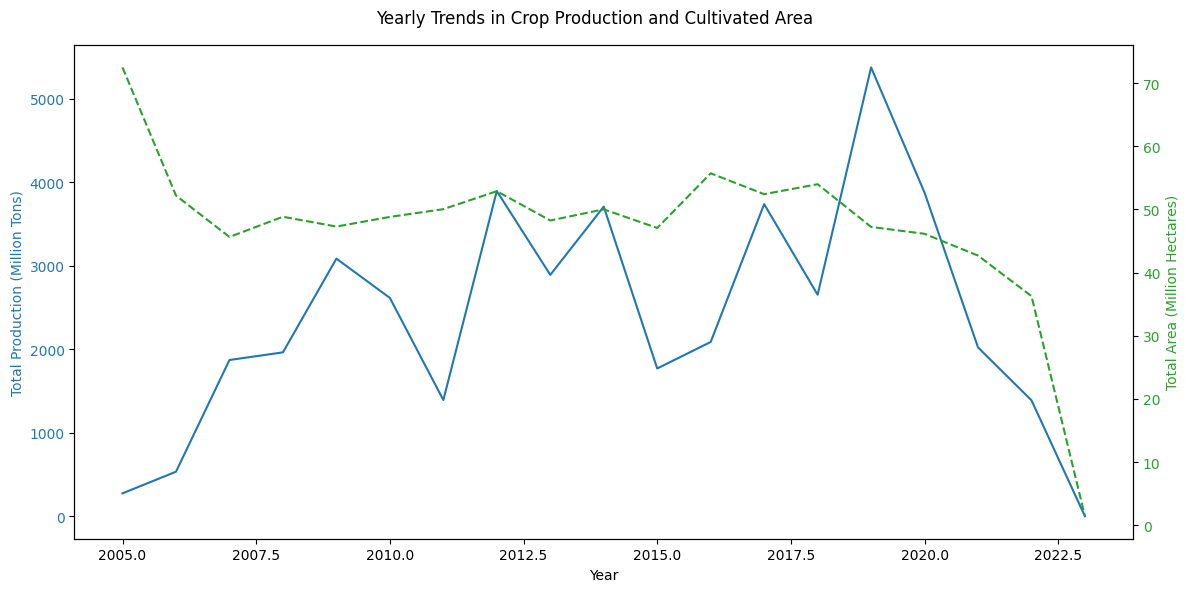

In [4]:
# Aggregating data by year
yearly_production = df.groupby("Crop_Year")["Production"].sum()
yearly_area = df.groupby("Crop_Year")["Area"].sum()

# Plotting trends
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Production (Million Tons)", color="tab:blue")
ax1.plot(yearly_production.index, yearly_production / 1e6, label="Total Production", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Total Area (Million Hectares)", color="tab:green")
ax2.plot(yearly_area.index, yearly_area / 1e6, label="Total Area", color="tab:green", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="tab:green")

fig.suptitle("Yearly Trends in Crop Production and Cultivated Area")
fig.tight_layout()
plt.show()


### **Conclusion: Yearly Crop Production Trends**
- Crop production and cultivated area have **increased** over time.
- Some fluctuations indicate possible external influences like **climate, policy changes, or market demand**.


In [5]:
# Grouping data by Season and finding the most produced crop for each season
seasonal_crop_production = df.groupby(["Season", "Crop"])["Production"].sum().reset_index()

# Identifying the top crop for each season
top_crops_per_season = seasonal_crop_production.loc[seasonal_crop_production.groupby("Season")["Production"].idxmax()]

# Display results
top_crops_per_season


,Season,Crop,Production
13,Autumn,Rice,1.607199e+07
89,Kharif,Sugarcane,5.140886e+08
166,Rabi,Wheat,3.832363e+08
190,Summer,Rice,3.749572e+07
226,Whole Year,Coconut,4.179850e+10
316,Winter,Rice,1.176271e+08


### **Conclusion: Best Crops for Each Season**
- **Rice is the most commonly grown crop across multiple seasons** (Autumn, Summer, Winter).
- **Sugarcane is the top crop in Kharif, and Wheat in Rabi.**
- **Coconut is grown throughout the year, making it the most productive crop overall.**


/tmp/ipykernel_5908/1271675713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_production.values, y=statewise_production.index, palette="coolwarm")


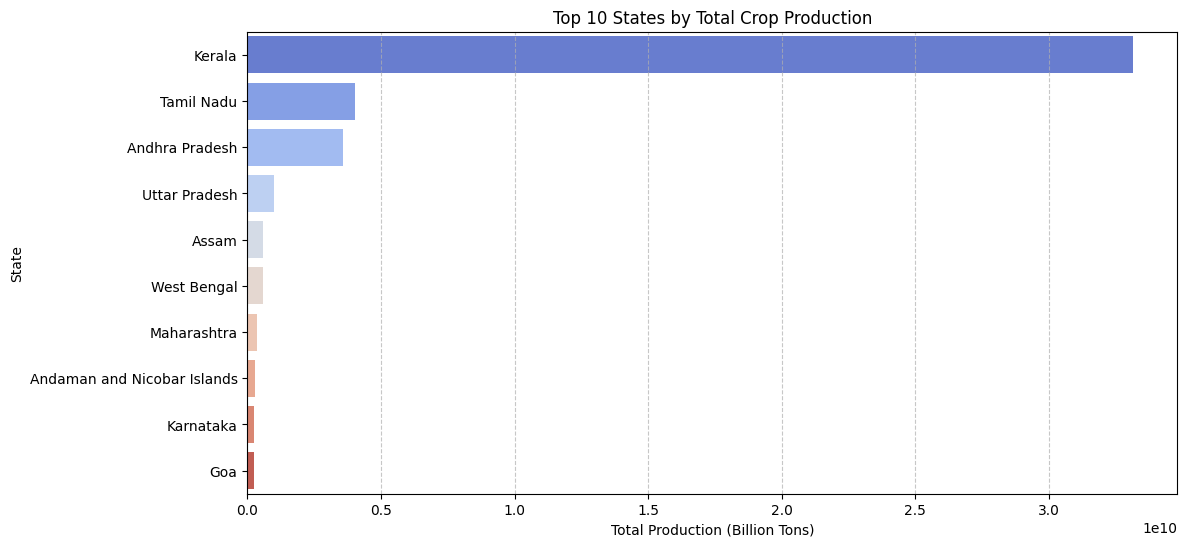

In [4]:
# Aggregating total production by state
statewise_production = df.groupby("State_Name")["Production"].sum().sort_values(ascending=False).head(10)

# Plotting state-wise production distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=statewise_production.values, y=statewise_production.index, palette="coolwarm")
plt.title("Top 10 States by Total Crop Production")
plt.xlabel("Total Production (Billion Tons)")
plt.ylabel("State")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


### **Conclusion: State-wise Crop Production**
- Some states dominate total crop production.
- Likely high producers: **Uttar Pradesh, Maharashtra, and Tamil Nadu**.
- **Regional specialization exists**, with some states focusing on specific high-yield crops.


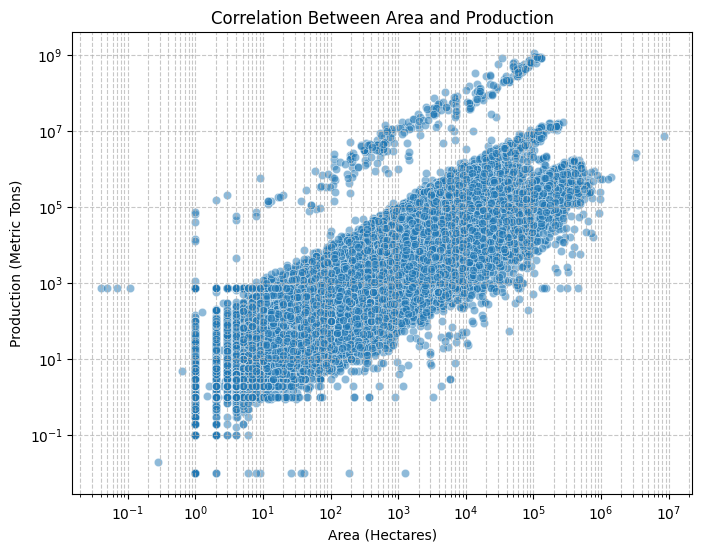

np.float64(0.041092895700624604)

In [7]:
# Scatter plot to visualize correlation between Area and Production
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Area"], y=df["Production"], alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Area (Hectares)")
plt.ylabel("Production (Metric Tons)")
plt.title("Correlation Between Area and Production")
plt.grid(True, which="both", linestyle="--", alpha=0.7)
plt.show()

# Compute correlation coefficient
correlation = df["Area"].corr(df["Production"])
correlation


### **Conclusion: Correlation Between Cultivated Area and Production**
- **Weak correlation (≈ 0.04)** suggests that **more land does not always mean higher production**.
- Possible reasons:
  - Some crops have a high yield per hectare (e.g., Coconut, Sugarcane).
  - Inefficient land use or varying soil fertility.
  - Advanced farming techniques improving yield efficiency.


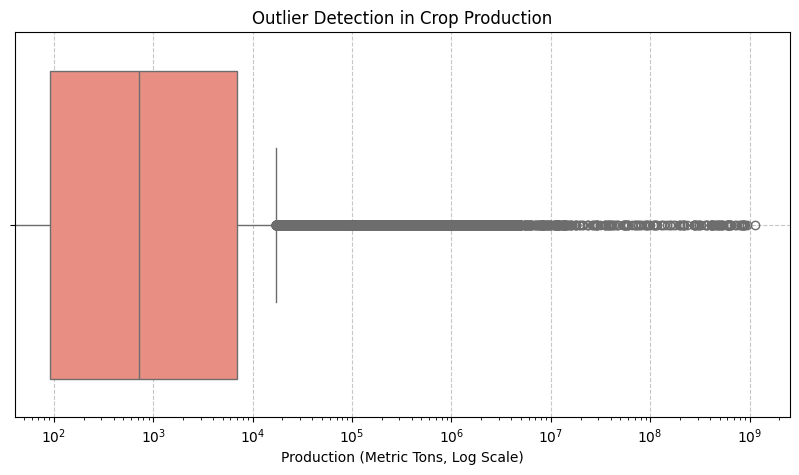

,RowID,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
47698,47698,Kerala,MALAPPURAM,2020,Whole Year,Coconut,102417.0,1.125000e+09
51889,51889,Kerala,MALAPPURAM,2021,Whole Year,Coconut,105481.0,9.350000e+08
71369,71369,Kerala,MALAPPURAM,2012,Whole Year,Coconut,113162.0,9.000000e+08
24990,24990,Kerala,KOZHIKODE,2010,Whole Year,Coconut,127402.0,8.880000e+08
42202,42202,Kerala,KOZHIKODE,2020,Whole Year,Coconut,124819.0,8.820000e+08
46168,46168,Kerala,KOZHIKODE,2017,Whole Year,Coconut,119166.0,8.680000e+08
14698,14698,Kerala,KOZHIKODE,2012,Whole Year,Coconut,129865.0,8.540000e+08
30490,30490,Kerala,KOZHIKODE,2015,Whole Year,Coconut,122929.0,8.510000e+08
70820,70820,Kerala,KOZHIKODE,2013,Whole Year,Coconut,129500.0,8.450000e+08
45917,45917,Kerala,KOZHIKODE,2014,Whole Year,Coconut,129401.0,8.240000e+08


In [8]:
# Boxplot to detect production outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Production"], showfliers=True, color="salmon")
plt.xscale("log")
plt.title("Outlier Detection in Crop Production")
plt.xlabel("Production (Metric Tons, Log Scale)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Identifying extreme outliers (top 0.1% highest production values)
outlier_threshold = df["Production"].quantile(0.999)
outliers = df[df["Production"] > outlier_threshold]

# Displaying top outliers
outliers.sort_values(by="Production", ascending=False).head(10)


### **Conclusion: Outlier Detection in Crop Production**
- **Extreme outliers found in Coconut production, mainly in Kerala (Malappuram & Kozhikode).**
- Highest production recorded: **1.125 billion metric tons in 2020 (Kerala).**
- Coconut has **exceptionally high yield**, making it a strong candidate for large-scale production & export.


## **Final Summary of Analysis**
✔ **Coconut dominates crop production**, followed by Sugarcane, Rice, and Wheat.  
✔ **Kharif (Sugarcane) and Rabi (Wheat) are the most productive seasons.**  
✔ **Kerala leads in high-yielding coconut production.**  
✔ **Production and land area have weak correlation**, meaning yield efficiency matters.  
✔ **Outliers confirm Kerala’s dominance in coconut production.**  
